In [2]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import os 
#os.chdir(r"D:\Python Code\Text Mining Msc") #Location Path my laptop

In [4]:
data=pd.read_csv("Farmer_Machine_learning.csv")
data_Target=data.copy()
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Sentiment
0,BeantMrahar,NaN,Twitter for Android,NaN,12-04-2021 03:13,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False,Positive
1,rumsomal,"brampton, universe",Twitter for Android,NaN,12-04-2021 03:13,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False,Negative
2,rumsomal,"brampton, universe",Twitter for Android,NaN,12-04-2021 03:13,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False,Negative
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,12-04-2021 03:13,False,628,"If we lose this fight, first we will become co...",0,False,Positive
4,__Argha__,NaN,Twitter for Android,NaN,12-04-2021 03:13,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False,Negative


In [4]:
data=pd.DataFrame(data.text)

data.head()

,text
0,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...
1,Delhi police is the Black Hand of BJP \n#Delhi...
2,Delhi police is the Black Hand of BJP \n#Delhi...
3,"If we lose this fight, first we will become co..."
4,'Disgraceful' and 'Discourteous' act of Delhi ...


In [5]:
data.iloc[991,0]

'Delhi police arresting people from Punjab that does belong to their jurisdiction. Is Punjab Govt sleeping?… https://t.co/CNTIUpPXBO'

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [6]:
data.text = data.text.str.lower()

In [7]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… https://t.co/cntiuppxbo'

# Step 2 :- Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [10]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… https://t.co/cntiuppxbo'

In [11]:
data['text'] = data['text'].apply(lambda x : remove_punctuation(x))

In [12]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… httpstcocntiuppxbo'

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [13]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

# Remove Number

In [14]:
data.iloc[57,0]

'bhupinderq33n tractor2twitr gillsukhmani111 navdeepsingh77 harshkumarbhal1 monicagill1 mahuamoitra… '

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [15]:
data['text'] = data['text'].str.replace('\d+','')

In [16]:
data.iloc[57,0]

'bhupinderqn tractortwitr gillsukhmani navdeepsingh harshkumarbhal monicagill mahuamoitra… '

# Removing Stop Words

In [17]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

In [19]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() #
                                                      if word not in (stop)]))

In [20]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

# Common Words

In [21]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

In [22]:
import re # replace of words
nltk.download('words') # dictionary 
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'ventroscopy',
 'importably',
 'reargument',
 'outwarble',
 'preterlabent',
 'nonsensicalness',
 'outtrick',
 'darnex',
 'patchiness',
 'perceptive',
 'unforgetting',
 'Adventist',
 'baseman',
 'meliceris',
 'hypoendocrinism',
 'unhedged',
 'apotome',
 'tristfulness',
 'English',
 'droner',
 'egglike',
 'harvestry',
 'unliberal',
 'Rahul',
 'teinland',
 'jailership',
 'Romescot',
 'disepalous',
 'thigmotactically',
 'cotch',
 'hydatiform',
 'gnathopodous',
 'Palaeozoic',
 'unstrange',
 'inconformity',
 'tinguy',
 'parodial',
 'octroi',
 'lawlike',
 'odontatrophy',
 'overrun',
 'rotation',
 'circummigration',
 'sklater',
 'foreglow',
 'spanglet',
 'undistinguished',
 'marsh',
 'electrotest',
 'Arauan',
 'homoeomorphism',
 'deindividuate',
 'podobranchial',
 'girtline',
 'numero',
 'pouched',
 'exemplar',
 'mammillate',
 'neurapophyseal',
 'unliturgical',
 'woodpeck',
 'napu',
 'diaminogen',
 'picnic',
 'routinize',
 'olden',
 'curvity',
 'frogface',
 'couxia',
 'hematozoan',
 'revalida

In [23]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)  #    
    return text

round2 = lambda x: clean_text_round2(x)

In [24]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(round2))
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

# Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [27]:
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

In [28]:
data['text'] = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

# Strip extra whitespace

In [29]:
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

In [30]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

* Finished Data Cleaning

# Term Document Matrix

In [31]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# One of the required inputs is a term-document matrix
data_dtm

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wouldnt,wow,wrath,write,wrong,yes,yesterday,young,youth,youve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_Target.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Sentiment
0,BeantMrahar,NaN,Twitter for Android,NaN,12-04-2021 03:13,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False,Positive
1,rumsomal,"brampton, universe",Twitter for Android,NaN,12-04-2021 03:13,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False,Negative
2,rumsomal,"brampton, universe",Twitter for Android,NaN,12-04-2021 03:13,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False,Negative
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,12-04-2021 03:13,False,628,"If we lose this fight, first we will become co...",0,False,Positive
4,__Argha__,NaN,Twitter for Android,NaN,12-04-2021 03:13,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False,Negative


# Machine Learning Model 

In [33]:
data_dtm['Sentiment'] = data_Target.Sentiment
data_dtm.head()

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wow,wrath,write,wrong,yes,yesterday,young,youth,youve,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Negative


### Data Partition

In [34]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split

train_x = data_dtm.drop(['Sentiment'],axis=1)
train_y = data_dtm['Sentiment']


X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=231)

### Model Building 

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=40, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=4)  #branches)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=100)

In [36]:
features=cv.get_feature_names_out()
features

array(['abduct', 'able', 'absolutely', 'abuse', 'accept', 'acceptable',
       'accomplish', 'accuse', 'act', 'action', 'active',
       'administration', 'admit', 'afraid', 'age', 'ago', 'agree',
       'ahead', 'aint', 'alien', 'alive', 'alter', 'amaze', 'appear',
       'applicable', 'approach', 'army', 'arrest', 'asset', 'attack',
       'attempt', 'attention', 'attitude', 'authority', 'autocracy',
       'automatic', 'autumn', 'availability', 'aware', 'backbone', 'bad',
       'badly', 'bahut', 'barb', 'barbaric', 'bastard', 'bear', 'beat',
       'beautiful', 'beauty', 'behavior', 'behaviour', 'behest',
       'believe', 'belong', 'bend', 'beneath', 'big', 'biggest',
       'billion', 'birthday', 'bitter', 'black', 'block', 'blockade',
       'blood', 'blunder', 'body', 'boot', 'bot', 'bow', 'boy', 'boycott',
       'brave', 'bread', 'break', 'bridge', 'bring', 'brother', 'brown',
       'brutal', 'brutality', 'brutalization', 'brutally', 'buddy',
       'build', 'bury', 'busy', 

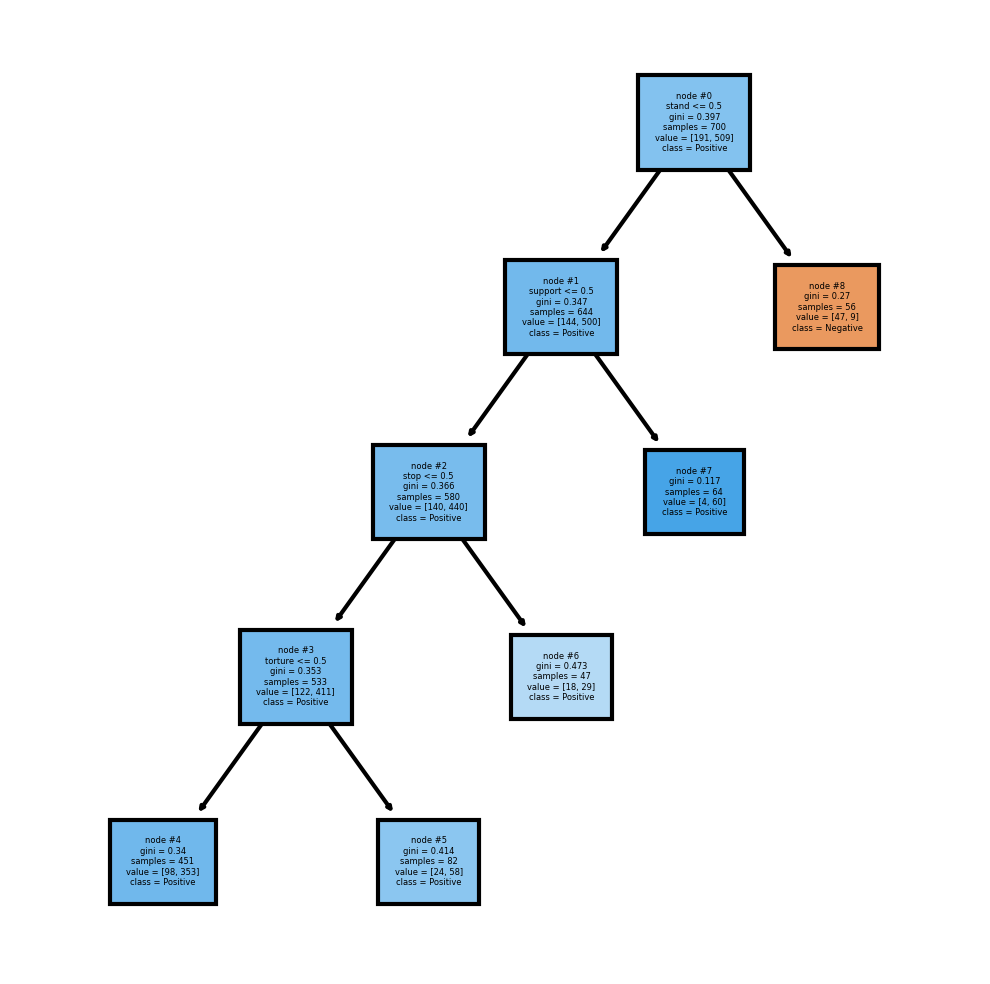

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt
churn=['Negative', 'Positive']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = features, 
               class_names=churn,
               filled = True,
              node_ids=True,
              fontsize=2);
#fig.savefig('imagename.png')

## Prediction on Train Data

In [38]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wow,wrath,write,wrong,yes,yesterday,young,youth,youve,Sentiment
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [39]:
train['Predicted'] = classifier.predict(X_train)
train.head()

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wrath,write,wrong,yes,yesterday,young,youth,youve,Sentiment,Predicted
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Negative
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


In [40]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.25      0.84      0.38        56
    Positive       0.98      0.78      0.87       644

    accuracy                           0.78       700
   macro avg       0.61      0.81      0.62       700
weighted avg       0.92      0.78      0.83       700



## Prediction on Test Data

In [41]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wow,wrath,write,wrong,yes,yesterday,young,youth,youve,Sentiment
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [42]:
test['Predicted'] = classifier.predict(X_test)
test.head()

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wrath,write,wrong,yes,yesterday,young,youth,youve,Sentiment,Predicted
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


In [43]:
from sklearn.metrics import classification_report
print(classification_report(test['Predicted'],test['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.26      0.70      0.38        30
    Positive       0.96      0.78      0.86       270

    accuracy                           0.77       300
   macro avg       0.61      0.74      0.62       300
weighted avg       0.89      0.77      0.81       300



# Finish